# Cálculo y estimación de probabilidades

En este *notebook* estudiaremos dos enfoques para el estudio de la probabilidad de eventos aleatorios:

- Calcular las probabilidades a mano, de forma exacta, usando la teoría de probabilidades que estudiamos y utilizando Python como "calculadora".

- Simular el experimento y estimar las probabilidades a partir de la frecuencia relativa. Esta estrategia es sumamente útil, especialmente cuándo no podemos calcular la probabilidad (¡hay muchos experimentos difíciles de modelar y en los que el cálculo de probabilidades no es fácil!). Estudiaremos el "porqué" de que esta estrategia funcione recién en la Posta 4, cuando estudiemos resultados de convergencia. Por ahora, con la intuición bastará.

Al final del *notebook* encontrarás la consigna para el Trabajo de Simulación 1.

## Cálculo de probabilidades

Comenzaremos esta sección calculando "a mano" algunas probabilidades que surgen de ejercicios similares a los del Libro y la Práctica 1.

### Ejemplo 1

Escribir un código para determinar, por enumeración, un espacio muestral finito y equiprobable para el experimento aleatorio que consiste en lanzar una moneda dos veces.

In [ ]:
posibles = {"cara","cruz"}
espacio_muestral = set()
for tiro1 in posibles:
  for tiro2 in posibles:
    salida = (tiro1, tiro2)
    espacio_muestral.add(salida)
print(espacio_muestral)

{('cruz', 'cara'), ('cara', 'cruz'), ('cara', 'cara'), ('cruz', 'cruz')}


¿Qué hicimos en el código anterior?

* usamos la función ``set()`` para crear un conjunto vacío;
* usamos el ciclo ``for`` para recorrer, itereativamente, los elementos del conjunto anterior. Notemos que debimos hacerlo dos veces ya que debíamos armar pares ordenados con el producto cartesiano del conjunto "posibles".
* usamos la función ``.add`` para añadir cada elemento al conjunto.

Lo anterior es útil, pero poco práctico si tuviéramos que obtener los elementos del espacio muestral de un experimento análogo, pero con 4 lanzamientos. ¿Por qué? Porque deberíamos recorrer un ciclo ``for`` cuatro veces... Hay formas más eficientes de hacer esto.

Para hacerlo más eficiente, vamos a usar la función ``product`` de la librería ``itertools``, que nos permitirá armar el producto cartesiano del conjunto "posibles" para armar las 4-uplas del espacio muestral. Al final, usamos la función ``len`` para contar los elementos del espacio, es decir, para conocer su cardinal.

In [ ]:
from itertools import product
posibles = {"cara","cruz"}
espacio_muestral = set(product(posibles, repeat=4))
print(espacio_muestral)
len(espacio_muestral)

{('cara', 'cara', 'cara', 'cara'), ('cara', 'cruz', 'cruz', 'cruz'), ('cruz', 'cara', 'cruz', 'cara'), ('cara', 'cara', 'cruz', 'cara'), ('cruz', 'cruz', 'cruz', 'cruz'), ('cruz', 'cara', 'cara', 'cruz'), ('cara', 'cruz', 'cruz', 'cara'), ('cruz', 'cara', 'cara', 'cara'), ('cara', 'cruz', 'cara', 'cruz'), ('cara', 'cruz', 'cara', 'cara'), ('cruz', 'cruz', 'cruz', 'cara'), ('cruz', 'cruz', 'cara', 'cruz'), ('cruz', 'cruz', 'cara', 'cara'), ('cara', 'cara', 'cara', 'cruz'), ('cruz', 'cara', 'cruz', 'cruz'), ('cara', 'cara', 'cruz', 'cruz')}


16

### Ejemplo 2

1. Escribir un código para determinar por enumeración un espacio muestral finito y equiprobable para el experimento de lanzar 3 dados y registrar los resultados obtenidos.
2. Escribir un código para determinar los elementos del evento "la suma de los resultados en dos lanzamientos de un dado no sea mayor que 7".
3. Calcular la probabilidad del evento del ítem anterior.

In [ ]:
# 2.1)
posibles = range(1,7)
espacio_muestral = set(product(posibles, repeat=2))
print(espacio_muestral)
len(espacio_muestral)

{(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3)}


36

In [ ]:
# 2.2)
E = set(x for x in espacio_muestral if sum(x)<7)
print(E)

{(2, 4), (1, 2), (2, 1), (1, 5), (3, 1), (4, 1), (1, 1), (5, 1), (4, 2), (1, 4), (2, 3), (3, 3), (2, 2), (3, 2), (1, 3)}


In [ ]:
# 2.3)
len(E)/len(espacio_muestral)

0.4166666666666667

¿Qué hicimos en el código anterior?

* usamos la función ``range()`` para crear el conjunto de posibles resultados del lanzamiento de un dado. Hay que recordar que ``range(a,b)`` devuelve los números enteros del intervalo $[a,b)$;
* usamos la función ``set()`` y ``product`` para armar el producto cartesiano del conjunto "posibles" para armar las duplas del espacio muestral. Ya habíamos cargado la función ``product`` de la librería ``itertools`` en esta sesión, por lo que no es necesario cargarla nuevamente;
* usamos la función ``set()`` para crear el conjunto del evento de interés y la sintaxis ``x for x in ...`` para poder dar la condición ``if`` que deberán cumplir los elementos que integrarán este conjunto. En este caso, usamos la función ``sum()`` para poder representar la condición de que la suma no sea mayor que 7, es decir, ``sum(x)<7``. Esta línea de código, entonces, guarda en el conjunto creado todos los elementos del espacio muestral tales que su suma es menor que 7;
* al final, usamos la función ``len`` para contar los elementos del conjunto y del espacio y, con esos cardinales, calcular la probabilidad pedida. Esto es posible ya que el espacio muestral así definido es finito y equiprobable.

### Ejemplo 3

Escribir un código para calcular la probabilidad de que la suma de los resultados del lanzamiento de 3 dados sea un múltiplo de 3.

In [ ]:
posibles = range(1,7)
espacio_muestral = set(product(posibles, repeat=3))
E = set(x for x in espacio_muestral if sum(x)%3==0)
len(E)/len(espacio_muestral)

0.3333333333333333

¿Qué hicimos en el código anterior?

Integramos todo lo que aprendimos antes. Notemos que en solo 4 líneas de código fue posible calcular una probabilidad que, de haberla querido calcular a mano, no hubiera sido sencillo. ¿Qué hubiese sido lo difícil? Posiblemente, el saber cuántos elementos de $\Omega$ hay en el conjunto $E$ asociado al evento "la suma de los resultados del lanzamiento de 3 dados sea un múltiplo de 3".

Sin embargo, al usar la condición ``sum(x)%3==0`` pudimos pedirle a la computadora que guarde todos los elementos que nos interesaba para luego contarlos y calcular la probabilidad buscada. Recordemos que el operador ``%`` calcula el resto de la división entera y, como queremos las ternas de $\Omega$ cuya suma sea divisible por 3, el resto de dividir esa suma por 3 tiene que ser 0.

### Ejemplo 4

Escribir un código para calcular la probabilidad de que el producto de los resultados de tres lanzamientos de un dados sea menor que 50.

In [ ]:
posibles = range(1,7)
espacio_muestral = set(product(posibles, repeat=3))
import numpy as np
E = set(x for x in espacio_muestral if np.prod(x)<50)
len(E)/len(espacio_muestral)

0.6944444444444444

¿Qué hicimos en el código anterior?

Algo muy parecido a lo que hicimos en el Ejemplo 3, solo que ahora la condición era que el producto de los elementos de la terna resultara menor que 50. Para poder multiplicar los elementos de la terna usamos la función ``prod`` de la librería ``numpy``.

La librería ``numpy`` de Python permite realizar cálculos avanzados, como los que típicamente encontraríamos en una buena calculadora científica. Con la sintaxis ``import numpy as np``, importamos todas las funciones disponibles en ella, pues como es una librería que usaremos con bastante frecuencia, no conviene ir importando una a una sus funciones. La abreviatura ``np`` nos permite usar sus funciones usando una sintaxis del tipo ``np.function()`` en lugar de ``numpy.function()``. Es frecuente usar este tipo de abreviaturas.

De esta forma, ``np.prod(x)`` permite calcular el producto conjunto de todos los elementos del objeto ``(x)``.

## Estimación de probabilidades

Comenzaremos esta sección estimando algunas probabilidades que surgen de ejercicios similares a los del Libro y la Práctica 1 y que podremos estimar a través de simulaciones.

En esencia, lo que haremos será simular un experimento aleatorio con Python y repetirlo una gran cantidad de veces para ver la frecuencia relativa de algún evento de interés. Pero antes de continuar, tenemos que presentar los números pseudo-aleatorios.

### Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función ``random``, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1.

Un número es aleatorio si la probabilidad de ser elegido fuera la misma para cualquiera de los de su clase, es decir, si todos ellos fueran *igualmente probables*. Estos números pueden modelarse teóricamente y estudiaremos su distribución de probabilidades recién en la Posta 3, cuando visitemos la distribución uniforme.

Ahora bien, los números aleatorios son muy difíciles de obtener y, en rigor, solo existen en la naturaleza. Sin embargo, después de muchos años de desarrollo e investigaciones de la Matemática y las Ciencias de la Computación, en la actualidad es posible obtener números _pseudo-aleatorios_, que no son aleatorios en sentido estricto pues son generados con algún algoritmo, pero se parecen _mucho_ a los que sí lo son. (¡A efectos prácticos son indistinguibles!)

In [ ]:
# Importamos la librería random
import random as rd

In [ ]:
#Cada vez que ejecutamos este código obtenemos un número distinto entre 0 y 1:
rd.random()

0.26589868380315873

In [ ]:
#Generamos 10 números pseudo-aleatorios y los imprimimos
for i in range(10):
    print(rd.random())

0.05397359699839521
0.8156688486834124
0.45503011498244783
0.9217394052243306
0.31660403705636475
0.4432842855606868
0.8964818435635685
0.857631770798965
0.4869149422788268
0.8164860031911331


Además, Python nos ofrece otras funciones prácticas:

 - ``rd.randint(a,b)`` devuelve un número entero entre a y b (inclusive). Todos los números entre a y b son *igualmente probables*.
 - ``rd.choice(lista)`` devuelve un elemento de ``lista`` (que debe ser una lista, cadena de caracteres, conjunto...). Todos los elementos son *igualmente probables*.

In [ ]:
for i in range(10):
    print (rd.randint(10,20))

11
15
15
10
17
13
15
13
18
18


In [ ]:
for i in range(10):
    print(rd.choice('AEIOU'))

E
A
I
E
A
O
O
O
O
I


### Semilla aleatoria

Como decíamos, estos números *parecen aleatorios* pero no lo son, porque **la computadora los obtiene aplicando reglas deterministas, algoritmos**. También vimos que esto no es un inconveniente en la práctica, porque son casi imposibles de distinguir de números auténticamente aleatorios.

De hecho, es una virtud, porque si fijamos una **semilla**, podemos obtener exactamente los mismos números, aunque hagamos el cálculo en máquinas distintas hoy, o varios años después.

In [ ]:
# Si cambiamos la semilla, las elecciones cambian,
# pero con la misma semilla obtenemos los mismos resultados.
rd.seed(9)
for i in range(10):
    print (rd.random())
for i in range(10):
    print (rd.randint(10,20))
for i in range(10):
    print(rd.choice('AEIOU'))

# Con esto deberíamos obtener la misma secuencia del inicio
rd.seed(1)
for i in range(10):
    print (rd.random())

0.46300735781502145
0.37331193139504204
0.13853941251445523
0.8665618499863413
0.006435054081123326
0.5027820800522084
0.8982979700319381
0.08081464718300102
0.5542704681782861
0.6166500426836184
10
16
12
17
16
12
12
13
10
11
E
U
U
A
O
A
I
E
E
O
0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631


### Simulaciones numéricas

Vamos a simular un ejercicio típico de probabilidad. Usaremos siempre el mismo enfoque:

- Escribimos una función aleatoria: *devuelve el resultado de simular el experimento una vez*. El resultado es distinto cada vez que llamamos a la función, y las distintas llamadas son **independientes** (por ahora nos conformaremos con una noción intuitiva de *independencia*: las llamadas son independientes porque el resultado de una llamada no nos ayuda a predecir el resultado de llamar una segunda vez). Es necesario ser capaces de simular el resultado del experimento usando las funciones del módulo ``random``.
- Tomamos una **muestra** de tamaño finito, llamando a la función anterior un número ``N`` de veces.
- Si queremos calcular la probabilidad de un *evento E* , necesitaremos una función que reciba como argumento un elemento ``x`` del espacio muestral, y devuelva ``True``si ``x`` pertenece al *evento E*, y ``False`` en caso contrario.
- Nuestra *aproximación a la probabilidad del evento E* será la *proporción* de elementos de la muestra que pertenecen a E, es decir

$$ P(E) \approx \frac{\text{nº de casos favorables}}{\text{tamaño de la muestra}}.$$

En la Posta 4 estudiaremos por qué esta estrategia efectivamente estima/aproxima a la probabilidad del evento de interés. Por ahora, con la intuición es suficiente.

#### Estructura de una simulación

#### 1): Experimento aleatorio

Cada ejecución del experimento aleatorio devuelve un elemento del espacio muestral.

```python
def experimento():
    resultado = ... random ...
    return resultado
```

#### 2): Muestra aleatoria

Recopilamos la muestra aleatoria, ejecutando el experimento un número N de veces.

```python
# Cuanto mayor N, más costoso es para la computadora,
# pero nos provee una mejor aproximación de la probabilidad.
N = 1000

# La función "muestra" hace N llamadas a la misma función "experimento",
# que cada vez, devuelve un resultado distinto
muestra = [experimento() for _ in range(N)]
```


#### 3): Una función _"filtro"_ que caracteriza el evento E

Devuelve True para los eventos elementales que pertenecen al evento E
```python
def es_evento_E(resultado):
    if ... condicion ... :
        return True
    else:
        return False
```

#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra

Aproximamos la probabilidad de E por la proporción  de elementos de E en la muestra: _sumamos 1 por cada elemento de la muestra que está en E y dividimos por el total de repeticiones_.

```python
# Para cada elemento "e" de la muestra, es_evento_E(e) es True
# si "e" pertenece a E. La suma de una secuencia de booleanos es la
# cantidad de booleanos que son "True"
proporcion_E = sum(es_evento_E(e) for e in muestra)/N

```

### Ejemplo 5

Se tienen dos urnas, y cada una de ellas contiene un número diferente de bolas blancas y rojas:
 - Primera urna, U1: 3 bolas blancas y 2 rojas;
 - Segunda urna, U2: 4 bolas blancas y 2 rojas.

Se realiza el siguiente experimento aleatorio: se tira una moneda al aire y

*   si sale cara se elige una bola de la primera urna y
*   si sale cruz se elige una bola de la segunda urna.

¿Cuál es la probabilidad de que salga una bola blanca?

Resolver "a mano", con lápiz y papel (la respuesta es $\frac{19}{30}$); luego, armar una simulación con $N=1000$ y estudiar si lo obtenido se aproxima a la probabilidad verdadera.

In [ ]:
#### 1: Experimento aleatorio
def experimento_urnas():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado puede ser 'B' (bola blanca) o 'R' (bola roja)
    '''
    # Lanzamos la "moneda".
    # Notemos que "lanzar la moneda" dará lugar a la misma
    # distribución de probabilidades que elegir entre los
    # números 1 y 2 con igual probabilidad (0.5 cada uno).
    urna = rd.randint(1,2)
    if urna == 1:
        # Sacamos una bola de la urna 1.
        return rd.choice('BBBRR')
    else:
        # Sacamos una bola de la urna 2.
        return rd.choice('BBBBRR')

In [ ]:
# Probamos la función.
# Es decir, simulamos 10 repeticiones de este experimento.
for _ in range(10):
    bola = experimento_urnas()
    print(bola)

In [ ]:
#### 2: Muestra aleatoria
# Sintentizamos lo anterior con un N=10 para ver que funciona bien.
N = 10
muestra = [experimento_urnas() for _ in range(N)]
print(muestra)

In [ ]:
#### 3: Una función _"filtro"_ que caracteriza el evento E

def es_bola_blanca(bola):
    '''
    Función que recibe como argumento un string, que puede ser
        "B" (representa una bola blanca)
        "R" (representa una bola roja)
    Devuelve True <=> el argumento es "B" (una bola blanca)
    '''
    return (bola=='B')

In [ ]:
#### Código alternativo totalmente equivalente al anterior
def es_bola_blanca(bola):
    '''
    Función que recibe como argumento un string, que puede ser
        "B" (representa una bola blanca)
        "R" (representa una bola roja)
    Devuelve True <=> el argumento es "B" (una bola blanca)
    '''
    if bola=='B':
        return True
    else:
        return False

In [ ]:
# Fijamos una semilla para que los resultados sean reproducibles.
# Testeamos la función anterior para un N grande
rd.seed(123)
N = 100
muestra = [experimento_urnas() for _ in range(N)]
muestra

In [ ]:
#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra
prob = sum(1 for e in muestra if es_bola_blanca(e))/N
print('Probabilidad aproximada de bola blanca:', prob)

# Probá cambiando la semilla: vas a ver que la aproximación cambia,
# pero, en general, variará "cerca" del verdadero valor 19/30=0.633... .

Probabilidad aproximada de bola blanca: 0.66


### Ejemplo 6

Una urna contiene 5 bolas numeradas 1, 2, 3, 4 y 5. Calcular la probabilidad de que al sacar 2 bolas **con** reposición la suma de los números de las bolas sea impar.

In [ ]:
#### 1: Experimento aleatorio
numeros1al5 = list(range(1,6))

def experimento_dos_bolas():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado es un par de números (las dos bolas)
    '''
    bola1 = rd.choice(numeros1al5)
    bola2 = rd.choice(numeros1al5)
    return [bola1, bola2]

In [ ]:
# La chequeamos
experimento_dos_bolas()

In [ ]:
#### 2: Muestra aleatoria
rd.seed(123)
N = 10000
muestra = [experimento_dos_bolas() for _ in range(N)]

#### 3: Una función _"filtro"_
def suma_es_impar(bolas):
    return sum(bolas)%2 == 1

#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra
prob = sum(1 for e in muestra if suma_es_impar(e))/N
print('Probabilidad aproximada de que la suma sea impar:', prob)

NameError: name 'experimento_dos_bolas' is not defined

¿Te animás a calcular esta probabilidad "a mano"? Si no querés hacerlo "a mano" (con lápiz y papel), también podemos usar los ejemplos de la sección de cálculo de probabilidades de este Notebook.

### Ejemplo 7

Una urna contiene 5 bolas numeradas 1, 2, 3, 4 y 5. Calcular la probabilidad de que al sacar 2 bolas **sin** reposición la sumade los números de las bolas sea impar.

In [ ]:
#### 1: Experimento aleatorio
numeros1al5 = range(1,6)

def experimento_dos_bolas_sin_reposicion():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado es un par de números (las dos bolas)
    '''
    # Usamos la función "sample" para elegir sin reposición
    bolas = rd.sample(numeros1al5,2)
    return (bolas)

In [ ]:
#### 2: Muestra aleatoria
rd.seed(1)
N = 1000
muestra = [experimento_dos_bolas_sin_reposicion() for _ in range(N)]

#### 3: Una función _"filtro"_,
# que es la misma que para el ejemplo 7
def suma_es_impar(bolas):
    return sum(bolas)%2 == 1

#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra
prob = sum(suma_es_impar(e) for e in muestra)/N
print('Probabilidad aproximada de que la suma sea impar:', prob)

NameError: name 'rd' is not defined

In [ ]:
numeros1al5 = range(1,6)
bolas = rd.sample(numeros1al5,2)
bolas

## Simulaciones numéricas versus cálculos exactos

Vamos a comparar el resultado obtenido con la simulación del ejemplo 5 y el cálculo de la probabilidad exacta obtenida con lo que estudiamos en esta posta.

### Ejemplo 5

Acá detallamos algo del proceso relativo al cálculo de la probabilidad, de forma exacta, del ejemplo 5. La extracción de una bola blanca puede darse de dos formas:

 - Sale cara en la moneda, y después extraemos una bola blanca de la primera urna.
 - Sale cruz en la moneda, y después extraemos una bola blanca de la segunda urna.

Ambos sucesos son incompatibles pues lo son ya que "cara" o "cruz" en la moneda son eventos complementarios. Luego, por el axioma 3 de la definición de probabilidad, la probabilidad de obtener bola blanca es la suma de las probabilidades de esos dos eventos.

Por otro lado, cada evento tiene dos etapas, con sus eventos asociados: el lanzamiento de una moneda equilibrada y la extracción al azar de una bola en la urna correspondiente. Luego, la **probabilidad total** de que salga bola blanca es la suma de las dos probabilidades

 - P(Cara) $\times$ P(Extraer bola blanca de la urna 1) = $\frac{1}{2} \times \frac{3}{5}$
 - P(Cruz) $\times$ P(Extraer bola blanca de la urna 2) = $\frac{1}{2} \times \frac{4}{6}$

Finalmente,
$$
P(\text{bola blanca}) =
\frac{1}{2}\times\frac{3}{5} + \frac{1}{2} \times \frac{4}{6} = \frac{19}{30}.
$$

In [ ]:
#### 2: Muestra aleatoria
# Probamos otra semilla distinta a la que usamos en el ejemplo
rd.seed(124)
N = 1000
muestra = [experimento_urnas() for _ in range(N)]

#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra
prob = sum(es_bola_blanca(e) for e in muestra)/N
print('Probabilidad aproximada de bola blanca:', prob)
print('Probabilidad exacta de bola blanca:', 19/30)

NameError: name 'rd' is not defined

### Ejemplos 6 y 7

Resolvé "a mano" los ejemplos 6 y 7; y verificá que las probabilidades exactas son $\frac{12}{25}$ y $\frac{3}{5}$. Luego, probá con diferentes semillas (a gusto) y diferentes tamaños de muestra ($N \in \{10,100,1000,10000\}$) para ver qué ocurre con las probabilidades estimadas a partir de las simulaciones.

In [ ]:
# Ejemplo 6 (dos bolas con reposición)
rd.seed(1)
N = 10000
muestra = [experimento_dos_bolas() for _ in range(N)]
prob = sum(suma_es_impar(e) for e in muestra)/N
print('Probabilidad aproximada de que la suma sea impar:', prob)
print('Probabilidad exacta de que la suma sea impar:', 12/25)

NameError: name 'rd' is not defined

In [ ]:
# Ejemplo 7 (dos bolas sin reposición)
rd.seed(1)
N = 10000
muestra = [experimento_dos_bolas_sin_reposicion() for _ in range(N)]
prob = sum(suma_es_impar(e) for e in muestra)/N
print('Probabilidad aproximada de que la suma de los puntos sea impar:', prob)
print('Probabilidad exacta de que la suma de los puntos sea impar:', 3/5)

# Trabajo de simulación 1

Para el primer trabajo de simulación, vamos a estudiar un problema clásico. Para entrar en tema, te invitamos a ver este video de [#DATAZO](https://youtu.be/QOLEHijfT2E).

El problema es así: en un grupo de $k$ personas elegidas al azar, ¿cuál es la probabilidad de que haya al menos dos que cumplan años el mismo día?

Para comenzar, hagamos algunos supuestos:

*   consideremos que un año tiene 365 días (¡sí, pobres lxs que cumplen el 29 de febrero!);
*   consideremos que es igualmente probable haber nacido cualquier día del año;
*   descartemos la posibilidad de que haya gemelxs en el grupo de personas.

Estos supuestos son necesarios para poder modelar el experimento de una forma sencilla.

## Resolución "a mano"

Queremos responder la siguiente pregunta: en un grupo de $k$ personas elegidas al azar, ¿cuál es la probabilidad de que haya al menos dos que cumplan años el mismo día?

Pensemos en el espacio muestral como el formado por todas las posibles fechas de cumpleaños de las $k$ personas del experimento.

$$\Omega = \{(x_1,\ldots,x_k) \text{ con } x_i\in\{1,\ldots,365\} \text{ para } 1\leq i \leq k\}.$$

Este espacio, así definido, es finito y equiprobable (¡aunque posiblemente tenga muchos elementos!). ¿Cuál es su cardinal? Como vemos, cada una de las $k$ personas tiene 365 posibilidades de fechas de cumpleaños, luego

$$\#\Omega=365^k.$$

Vamos a querer calcular la probabilidad de que en un grupo de $k$ personas elegidas al azar, haya **al menos dos** que cumplan años el mismo día. Lo que ocurre es que hay muchas posibles parejas de personas que cumplan años un mismo día; y contar los elementos del conjunto formado por estas puede ser muy pesado. Entonces, lo que puede convenir es calcular primero la probabilidad de que ninguna persona de un conjunto de $k$ personas elegidas al azar cumpla años el mismo día que otra.

Armemos el conjunto $E:$ "ninguna de las $k$ personas del grupo cumple años el mismo día". Necesitamos saber cuál es su cardinal. Hay $k$ personas:

- la primera cumple años en una de las 365 fechas posibles, fijémosla,
- luego, la segunda ya no tiene 365 fechas posibles, sino 364, pues una de las fechas ya fue fijada por la primera persona,
- luego, la tercera ya no tiene 365 ni 364 fechas posibles, sino 363, pues dos fechas fueron fijadas por las primeras dos personas,
y así, sucesivamente, hasta llegar a la persona $k$. Es decir, el cardinal de $E$ es el siguiente

$$\#E=365\times 364\times 363\times \cdots \times 365-k+1.$$

De esta forma, la probabilidad buscada es
$$p=\frac{365\times 364\times 363\times \cdots \times (365-k+1)}{365^k}.$$

Ahora, $1 - p$ es la probabilidad que buscamos, pues el evento "al menos dos personas de las $k$ elegidas cumple años el mismo día" es el complemento del evento "ninguna persona de las $k$ elegidas cumple años el mismo día".

Es decir, la probabilidad de que en un grupo de $k$ personas elegidas al azar, haya **al menos dos** que cumplan años el mismo día es igual a

$$1-\frac{365\times 364\times 363\times \cdots \times (365-k+1)}{365^k}.$$

Para calcular esta probabilidad, basta definir de qué tamaño será el grupo ($k$) y hacer la cuenta. Por ejemplo, para $k=23$ se tiene que

$$1-\frac{365\times 364\times 363\times \cdots \times 343}{365^{23}}.$$

Podemos armar una función en Python que haga esta cuenta.

In [ ]:
import math
def proba_cumples(k):
    '''
    proba_cumples(k) devuelve la probabilidad de que en un grupo de k
    personas elegidas al azar haya al menos dos que cumplañ años el mismo día
    '''
    prob = 1-math.prod(range(365-k+1,366))/(365**k)
    return prob

In [ ]:
proba_cumples(60)

0.994122660865348

## Simulación (ejercicio a entregar)

Armar una simulación basada en $N=1000$ repeticiones que permita estimar la probabilidad de que al menos dos personas en un grupo de $k$ personas elegidas al azar cumpla años el mismo día. Dar una lista de las probabilidades estimadas en función de $k$ para $k$ entre 1 y 50. **[OPCIONAL]** Si es posible, representar esas probabilidades estimadas en un gráfico.

Para la construcción de la simulación, se sugiere seguir la estructura propuesta en el apartado de simulaciones numéricas de este Notebook. Es decir, para un valor de $k$ que hayamos fijado, puede hacerse lo siguiente.

1.  Para el armado del bullet "1. Experimento aleatorio", definir la función ``cumples(k)``, que devuelva ``k`` fechas de cumpleaños (``k`` números entre 1 y 365).
2.  Para el armado del bullet "2: Muestra aleatoria", definir una semilla, fijar ``N`` y armar ``N=1000`` muestras de ``cumples(k)`` que se guarden en ``muestras``.
3.  Para el armado del bullet "3: Una función _filtro_ que caracteriza el evento E", definir la función ``hay_coincidencia(cumples)`` que devuelva ``TRUE`` (o un 1) si hay una coincidencia en una lista ``cumples`` que sea pasada como argumento. Esta es la función que quizás sea más difícil de implementar. Hay muchas formas de hacerlo. Como pista, la función ``set()`` que ya usamos es una estructura de datos ideal para contener objetos sin repeticiones.
4.  Para el armado del bullet "4: Aproximamos P(E) por la proporción de elementos de E en la muestra" contar la proporción de ``hay_coincidencia()`` en las ``N`` repeticiones de la muestra y devolver ese valor.

**[SUGERENCIA]** Como quiere estimarse la probabilidad en las simulaciones para grupos de $k$ personas, donde $k$ varía desde 0 hasta 50 personas, puede crearse una función ``proporcion_coincidencia(k,N)`` que devuelva directamente una aproximación a la probabilidad de coincidencia en función del número de personas ``k``; sin tener que simular las ``N`` repeticiones en cada caso por separado. En esta función ``proporcion_coincidencia(k,N)`` pueden usarse, dentro, las funciones ``cumples()`` y ``hay_coincidencia()``.

# **Ejercicio de TP-Simulación:**

Integrantes del equipo:

*   Nicolas Lautaro Lanselota
*   Iván Federico González
*   Oscar Julian Sosa Ortiz
*   José Manuel Acevedo
*   Mariano Fabián González


In [ ]:
import random

def cumples(k):
    """Genera k fechas de cumpleaños aleatorias"""
    return [random.randint(1, 365) for _ in range(k)]

def hay_coincidencia(cumples):
    """Verifica si hay al menos dos personas con la misma fecha de cumpleaños"""
    return len(set(cumples)) != len(cumples)

def proporcion_coincidencia(k, N):
    """Estima la probabilidad de coincidencia para un grupo de k personas mediante N repeticiones"""
    coincidencias = sum(hay_coincidencia(cumples(k)) for _ in range(N))
    return coincidencias / N

k = 1: 0.0000
k = 2: 0.0070
k = 3: 0.0080
k = 4: 0.0160
k = 5: 0.0290
k = 6: 0.0310
k = 7: 0.0430
k = 8: 0.0770
k = 9: 0.0870
k = 10: 0.1190
k = 11: 0.1360
k = 12: 0.1850
k = 13: 0.2000
k = 14: 0.2450
k = 15: 0.2370
k = 16: 0.2990
k = 17: 0.3290
k = 18: 0.3700
k = 19: 0.3560
k = 20: 0.4390
k = 21: 0.4310
k = 22: 0.4620
k = 23: 0.4980
k = 24: 0.5250
k = 25: 0.5460
k = 26: 0.5840
k = 27: 0.6590
k = 28: 0.6550
k = 29: 0.6780
k = 30: 0.7050
k = 31: 0.7140
k = 32: 0.7580
k = 33: 0.7960
k = 34: 0.7990
k = 35: 0.8020
k = 36: 0.8340
k = 37: 0.8630
k = 38: 0.8560
k = 39: 0.8950
k = 40: 0.8950
k = 41: 0.9100
k = 42: 0.9160
k = 43: 0.9110
k = 44: 0.9180
k = 45: 0.9510
k = 46: 0.9450
k = 47: 0.9590
k = 48: 0.9700
k = 49: 0.9750
k = 50: 0.9700


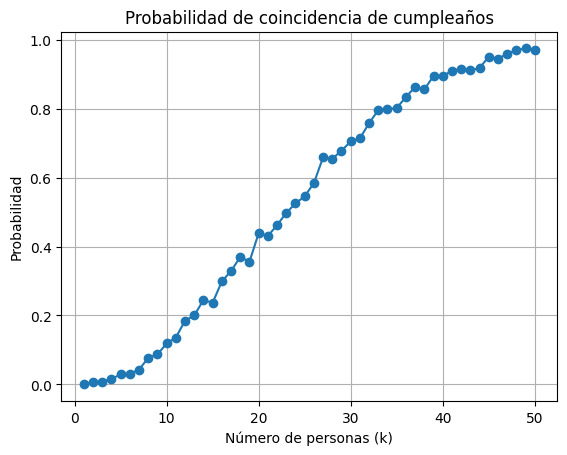

In [ ]:
# Calcular probabilidades para k de 1 a 50
probabilidades = [proporcion_coincidencia(k, 1000) for k in range(1, 51)]

# Imprimir probabilidades
for k, prob in enumerate(probabilidades, start=1):
    print(f'k = {k}: {prob:.4f}')

# Representar las probabilidades en un gráfico (opcional)
import matplotlib.pyplot as plt

plt.plot(range(1, 51), probabilidades, marker='o')
plt.title('Probabilidad de coincidencia de cumpleaños')
plt.xlabel('Número de personas (k)')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()

**1.Para el armado del bullet "1. Experimento aleatorio", definir la función cumples(k), que devuelva k fechas de cumpleaños (k números entre 1 y 365)...**


In [ ]:
import random

def cumples(k):
    """Genera k fechas de cumpleaños aleatorias."""
    cumpleanos = []
    for _ in range(k):
        dia_cumple = random.randint(1, 365)
        cumpleanos.append(dia_cumple)
    return cumpleanos

print(cumples(50));

[33, 349, 80, 315, 86, 51, 117, 223, 327, 218, 234, 221, 161, 294, 341, 279, 144, 158, 63, 328, 255, 354, 94, 343, 282, 253, 314, 97, 143, 238, 356, 51, 38, 60, 238, 10, 217, 75, 268, 45, 338, 301, 241, 121, 187, 265, 317, 103, 157, 67]


**2. Para el armado del bullet "2: Muestra aleatoria", definir una semilla, fijar N y armar N=1000 muestras de cumples(k) que se guarden en muestras.**

In [ ]:
import random

def generar_muestras(N, k):
    """Genera N muestras de cumpleaños para grupos de k personas."""
    muestras = []
    for _ in range(N):
        muestra = cumples(k)
        muestras.append(muestra)
    return muestras

# Establecer una semilla aleatoria
random.seed(42)  # Puedes usar cualquier número como semilla

# Fijar el valor de N (el número de repeticiones)
N = 1000

# Generar N muestras de cumpleaños para grupos de k personas
k = 50  # Por ejemplo, para un grupo de 10 personas
muestras = generar_muestras(N, k)

# Imprimir una muestra de las muestras generadas
print("Ejemplo de muestra generada para un grupo de 50 personas:")
print(muestras[0])


Ejemplo de muestra generada para un grupo de 50 personas:
[328, 58, 13, 141, 126, 115, 72, 53, 347, 280, 45, 303, 217, 17, 16, 48, 112, 120, 259, 309, 14, 288, 102, 333, 360, 280, 215, 113, 230, 302, 143, 4, 82, 358, 217, 175, 143, 80, 111, 173, 53, 48, 195, 50, 184, 177, 310, 136, 23, 236]


**Para el armado del bullet "3: Una función filtro que caracteriza el evento E", definir la función hay_coincidencia(cumples) que devuelva TRUE (o un 1) si hay una coincidencia en una lista cumples que sea pasada como argumento. Esta es la función que quizás sea más difícil de implementar. Hay muchas formas de hacerlo. Como pista, la función set() que ya usamos es una estructura de datos ideal para contener objetos sin repeticiones.**

In [ ]:
def hay_coincidencia(cumples):
    """Verifica si hay al menos dos fechas iguales en una lista de cumpleaños."""
    conjunto_cumples = set(cumples)
    if len(conjunto_cumples) < len(cumples):
        return True  # Hay al menos dos fechas iguales
    else:
        return False  # No hay fechas iguales

# Ejemplo de uso:
# fechas_cumpleanos = [3, 5, 12, 18, 5]  # Ejemplo con dos fechas iguales
# print(hay_coincidencia(fechas_cumpleanos))


**4. Para el armado del bullet "4: Aproximamos P(E) por la proporción de elementos de E en la muestra" contar la proporción de hay_coincidencia() en las N repeticiones de la muestra y devolver ese valor.**

In [ ]:
def aproximacion_probabilidad_E(N, k):
    """Aproxima la probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños."""
    muestras = generar_muestras(N, k)  # Generar N muestras de cumpleaños para grupos de k personas
    coincidencias = sum(hay_coincidencia(muestra) for muestra in muestras)  # Contar coincidencias en las muestras
    probabilidad_E = coincidencias / N  # Calcular la proporción de veces que ocurre el evento E
    return probabilidad_E

# Ejemplo de uso:
# N = 1000  # Número de repeticiones
# k = 30  # Número de personas en el grupo
# probabilidad = aproximacion_probabilidad_E(N, k)
# print(f"La probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños en un grupo de {k} personas es aproximadamente: {probabilidad:.4f}")


In [ ]:
 probabilida = aproximacion_probabilidad_E(1000, 50)
 print(f"La probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños en un grupo de {k} personas es aproximadamente: {probabilida:.4f}");

La probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños en un grupo de 50 personas es aproximadamente: 0.9680


*Como quiere estimarse la probabilidad en las simulaciones para grupos de k personas, donde k varía desde 0 hasta 50 personas, puede crearse una función proporcion_coincidencia(k,N) que devuelva directamente una aproximación a la probabilidad de coincidencia en función del número de personas k; sin tener que simular las N repeticiones en cada caso por separado. En esta función proporcion_coincidencia(k,N) pueden usarse, dentro, las funciones cumples() y hay_coincidencia().*

In [ ]:
def proporcion_coincidencia(k, N):
    """Aproxima la probabilidad de coincidencia en función del número de personas k."""
    probabilidad_total = 0
    for _ in range(N):
        probabilidad_total += aproximacion_probabilidad_E(1, k)  # Utilizamos 1 repetición para estimar la probabilidad
    probabilidad_promedio = probabilidad_total / N
    return probabilidad_promedio

# Ejemplo de uso:
# k = 10  # Por ejemplo, para un grupo de 10 personas
# N = 1000  # Número de repeticiones
# probabilidad = proporcion_coincidencia(k, N)
# print(f"La probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños en un grupo de {k} personas es aproximadamente: {probabilidad:.4f}")


In [ ]:
probabilidad = proporcion_coincidencia(50, 1000)
print(f"La probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños en un grupo de {k} personas es aproximadamente: {probabilidad:.4f}")

La probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños en un grupo de 50 personas es aproximadamente: 0.9660
